# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [72]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [73]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">
<hr style="height:2pt">

<div class='theme'>Linear Algebra, Accuracy, and Confidence Intervals </div>
In this part of the homework, you will see how _uncertainty_ in the beta coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. You will explore a linear-algebra formula that tells us how accurately we've learned the beta parameters, going beyond simple SEs to describe the joint distribution of the betas. You'll see that the structure of the $X$ data can strongly impact how well we can learn the betas, and you'll determine desirable prroperties of the $X$ data.

The data for this supplement are the same as in lab1, and are imported for you in the cells below.

In [74]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [75]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]


X = sm.add_constant(X)

---- 


<div class='exercise'> <b> Question 5 [4 pts] </b> </div>

**5.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The regression line.
 3. The upper and lower bounds of the 95% confidence interval for the _mean/predicted_ (not the observed) `mpg` at any given displacement.
 
**5.2** Why do we have a confidence interval for our predicted value? Why isn't the prediction just a single number?

**5.3** Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them? paying attention to the confidence interval (5.1.3) above?

**5.4** Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center? 

### Answers

**5.1 Fit a linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various levels of `disp` and make a well-labled plot showing**
 1. **The observed values of weight and mpg**
 2. **The regression line**
 3. **The upper and lower bounds of the 95% confidence interval for the_mean/predicted_ (not the observed) `mpg`at any given displacement**

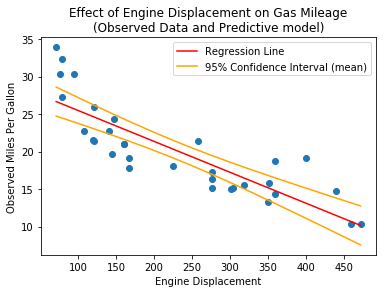

In [76]:
# your code here 
x_var = 'disp'

# fit a simple linear regression predicting mpg via weight
simple_model = sm.OLS(y, X[['const',x_var]]).fit()
simple_model.summary()


x_vals = np.linspace(X[x_var].min(),X[x_var].max(),500)
line_y_vals = simple_model.predict(sm.add_constant(x_vals))

prediction_int = simple_model.get_prediction(sm.add_constant(x_vals)).summary_frame()

plt.scatter(X[x_var],y)
plt.plot(x_vals,line_y_vals,c='r', label="Regression Line")
plt.plot(x_vals,prediction_int['mean_ci_upper'],c='orange',label="95% Confidence Interval (mean)")
plt.plot(x_vals,prediction_int['mean_ci_lower'],c='orange',label="")
#plt.plot(x_vals,prediction_int['obs_ci_upper'],c='g',label="95% Prediciton Interval (future obs)")
#plt.plot(x_vals,prediction_int['obs_ci_lower'],c='g', label="")
plt.xlabel("Engine Displacement")
plt.ylabel("Observed Miles Per Gallon")
plt.title("Effect of Engine Displacement on Gas Mileage\n(Observed Data and Predictive model)")
plt.legend();
plt.show()

**5.2 Why do we have a confidience interval for our predicted value? Why isn't the prediction just a single number?**

*your answer here*

The regression line predicts mean `mpg` at each value of `disp` (for instance we think the average `mpg` of all cars with `disp`=250 will be 20 miles per gallon). However, we don't perfectly know what the average `mpg` is at each `disp` value, and if we re-collected the data and re-ran our model our prediction might be higher or lower. The bounds above give a reasonable estimate of where the true average `mpg` might be.

**5.3 Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them, paying attention to the confidence interval (5.1.3) above?**

In [5]:
# your code here

print("Confidence interval data for disp=400:")
simple_model.get_prediction([1,400]).summary_frame()

Confidence interval data for disp=400:


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.113807,0.983136,11.105976,15.121638,6.176537,20.051077


*your answer here*

We should tell them:
1. My best single estimate is that the car will get 13.11 miles per gallon.
2. However, I'm not completely certain in that value. Based on the data, the optimal prediciton could reasonably be anywhere between 11.1 and 15.12.
3. The range of _actual_ `mpg` ratings we see could reasonably be as low as 6.17 or as high as 20.05. The range quoted above is only describing what I think the _average_ `mpg` of cars with a `disp` of 400 might be.

**5.4 Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center?**

*your answer here*

All regression lines (with an intercept) must pass through the average value of the data-- if the predictor is at its mean, guess the mean of the response. However, suppose we move 10 units away from the mean, and our uncertainty in the slope is +/-.2 mpg/disp. The lower bound at 10 units would be -2 units and the upper bound would be +2 units. If we moved 20 units instead, the same error in the slope gives bounds at +/- 4 units. The farther out we move, the wider our bounds have to be.

<div class='exercise'><b> Question 6 [8 pts] </b></div>
Hopefully, in the question above you recognized that uncertainty in the beta coefficients could impact the certainty of our predictions. In this question and the next, we're going to explore properties of the data that can make us more or less certain of the values of the betas.

**6.1** Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.

**6.2** The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. 

**6.3** Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.

**6.4** Interpret the matrix formula above. At a minimum, discuss what affects our ability to estimate the betas accurately. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will be graded only on the specified minimum].

**Hint**: we don't know $\sigma^2$, but we can estimate them.<BR>
**Hint**: remember that numpy's normal distribution expects a standard deviation and not a variance.

### Answers

**6.1 Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.**

In [6]:
# your code here
fitted_model = sm.OLS(y, X).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           6.18e-10
Time:                        14:41:02   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.001      15.487      56.261
cyl           -1.1561      0.715     -1.616      0.118      -2.626       0.314
disp           0.0119      0.012      1.004      0.325      -0.013       0.036
hp            -0.0158      0.015     -1.037      0.309      -0.047       0.016
wt            -4.2253      1.252     -3.374      0.002      -6.800      -1.651
qsec           0.2538      0.487      0.521      0.607      -0.748       1.256
==============================================================================
Omnibus:                        4.925   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.534
Skew:                           0.782   Prob(JB):                        0.171
Kurtosis:                       3.453   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**6.2 The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. **

In [11]:
# your code here

def get_beta_cov_mat(X,y):
    fitted_model = sm.OLS(y,X).fit()
    
    sse = np.sum((y.reshape(1,-1)-fitted_model.predict(X).values)**2)
    sigma_est = sse/(X.shape[0]-X.shape[1])

    var_cov = sigma_est*np.linalg.inv(np.dot(X.T,X))
    return pd.DataFrame(var_cov, columns=X.columns.values, index=X.columns.values)

beta_cov_mat = get_beta_cov_mat(X,y)
beta_cov_mat

,const,cyl,disp,hp,wt,qsec
const,98.368517,-3.780794,0.018899,-0.083821,4.959981,-4.638669
cyl,-3.780794,0.511577,-0.004108,-0.001251,-0.169858,0.128479
disp,0.018899,-0.004108,0.000142,-0.000024,-0.008850,0.000328
hp,-0.083821,-0.001251,-0.000024,0.000233,-0.004826,0.004399
wt,4.959981,-0.169858,-0.008850,-0.004826,1.568470,-0.347664
qsec,-4.638669,0.128479,0.000328,0.004399,-0.347664,0.237618


**6.3 Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.**

In [12]:
# your code here
print("SEs from matrix:",np.sqrt(np.diag(beta_cov_mat)))

SEs from matrix: [9.91809038 0.71524643 0.01190742 0.01526723 1.25238578 0.48746086]


*your answer here*

Horray, they match the SEs in the summary table

**6.4 Interpret the matrix formula above. At a minimum, discuss what affects our ability to accurately estimate the betas. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will only be graded on the specified minimum].**

*your answer here*

The formula has a constant multiplier of $\sigma^2$, the irreducible noise in the data-generating process, so whenever the noise goes up, all our estimates get less accurate. 

Beyond that, the formula uses the inverse of the $X^TX$, so our knowledge of the betas will be tied to the correlation structure / similarity of the features. We might (wrongly) expect that a large similarity between two features would create a small covariance in their betas, since this formula uses the inverse of the $X^TX$ similarity matrix.

<div class='exercise'> <b> Question 7 [12 pts]: What affects our knowledge of the betas? </b></div> 


**7.1** Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution). Using the formula for the covariance of the betas, what effects do you see on our ability to estimate the betas?

**7.2** Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight. Using the formula for the covariance of the betas, what change do you see in our certainty about weight's effect on mpg?

**7.3** Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise. Using the formula for the covariance of the betas, how well can we estimate the betas for this dataset, and which ones are correlated?

**7.4** If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, or by deciding which columns to measure/keep), how would you like your features to relate? Specifically, how can you get as good an estimate of the betas as possible?

**Hint**: Should introducing pure noise give us meaningfully more accurate beta values? <br>
**Hint**: What happens if $X^TX$ is diagonal?

### Answers

**7.1  Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution) ... **

In [19]:
# your code here
edit1 = X.copy()
edit1['noise'] = np.random.exponential(10,size=X.shape[0])

print("Changes in accuracy:")
pd.DataFrame(get_beta_cov_mat(edit1,y).values[:-1,:-1] - get_beta_cov_mat(X,y).values, columns=X.columns.values, index=X.columns.values)

Changes in accuracy:


,const,cyl,disp,hp,wt,qsec
const,17.932429,-0.552929,-0.003721,0.013561,-0.400964,-0.644033
cyl,-0.552929,0.018022,0.000105,-0.000427,0.012273,0.019750
disp,-0.003721,0.000105,0.000001,-0.000003,0.000065,0.000136
hp,0.013561,-0.000427,-0.000003,0.000011,-0.000335,-0.000481
wt,-0.400964,0.012273,0.000065,-0.000335,0.013795,0.013889
qsec,-0.644033,0.019750,0.000136,-0.000481,0.013889,0.023212


**7.2 Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight ... **

In [20]:
# your code here
edit2 = X.copy()
edit2['ratio'] = edit2['hp']/edit2['wt']

print("Changes in accuracy:")
pd.DataFrame(get_beta_cov_mat(edit2,y).values[:-1,:-1] - get_beta_cov_mat(X,y).values, columns=X.columns.values, index=X.columns.values)

Changes in accuracy:


,const,cyl,disp,hp,wt,qsec
const,69.777665,-1.382871,0.014894,0.306407,-13.255780,-1.061523
cyl,-1.382871,0.042240,-0.000418,-0.005864,0.246347,0.021476
disp,0.014894,-0.000418,0.000008,0.000066,-0.003211,-0.000179
hp,0.306407,-0.005864,0.000066,0.001457,-0.063054,-0.004004
wt,-13.255780,0.246347,-0.003211,-0.063054,2.787984,0.168079
qsec,-1.061523,0.021476,-0.000179,-0.004004,0.168079,0.020750


**7.3 Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise... **

In [21]:
# your code here
edit3 = X.copy()
edit3['combo'] = edit3['hp']+edit3['wt']+edit3['disp'] +np.random.normal(0,.01,size=X.shape[0])

print("Changes in accuracy:")
pd.DataFrame(get_beta_cov_mat(edit3,y).values[:-1,:-1] - get_beta_cov_mat(X,y).values, columns=X.columns.values, index=X.columns.values)

Changes in accuracy:


,const,cyl,disp,hp,wt,qsec
const,-11.061934,0.361917,-21.007017,-20.996628,-21.686745,0.536395
cyl,0.361917,-0.039400,5.559511,5.559567,5.607744,-0.015230
disp,-21.007017,5.559511,1578.040949,1578.150271,1586.308986,-0.118299
hp,-20.996628,5.559567,1578.150271,1578.259550,1586.418397,-0.118777
wt,-21.686745,5.607744,1586.308986,1586.418397,1594.437436,-0.078797
qsec,0.536395,-0.015230,-0.118299,-0.118777,-0.078797,-0.027388


**7.4 If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, ... **

*your answer here*

There's nothing we can do about the $\sigma^2$ term, but we'd like it to be small. (We'd also like a pony).

The rest of the game is making the terms in the inverse matrix as small as possible. First, let's make the covariances/correlations of the features zero (so that all off-diagonal entries of $(X^TX)$ are zero). That makes the $X^TX$ matrix diagonal, which makes the inverse easy to calculate: we just invert each entry on the diagonal. Therefore we want to make the diagonal entries as large as possible, which means making each feature as 'long' as possible. That is, we'd prefer each feature to cover a wide range of values.

Intuitively, we'd like to collect data about low displacements, high displacements, and everything in between, and we'd like for all other features to not be confounded with displacement. We'd like for each new feature included in the model to be measuring something completely different than what the existing features capture (otherwise we won't know which feature to assign the effect to).

Finally, we'd like for the included features to actually predict the response. We could include a bunch of uncorrelated noise terms and get very accurate measures of the beta values, but the actual betas would be zero.